# Explore here

None
4c2fe590117545e48d4a430d0f3553dd
The top 10 tracks by Quevedo are:
Columbia - Quevedo
Quevedo: Bzrp Music Sessions, Vol. 52 - Bizarrap, Quevedo
Buenas - Quevedo, Saiko
PUNTO G - Quevedo
OA - Anuel AA, Quevedo, Maluma, Mambo Kingz, DJ Luian
POLARIS - Remix - Saiko, Quevedo, Feid, Mora
VISTA AL MAR - Quevedo
PLAYA DEL INGLÉS - Quevedo, Myke Towers
WANDA - Quevedo
GANGSTER (PQFNEDG) - Ovy On The Drums, Quevedo, Yandel
                                    name  duration_ms  popularity
0                               Columbia       186000          95
1  Quevedo: Bzrp Music Sessions, Vol. 52       198937          89
2                                 Buenas       192954          86


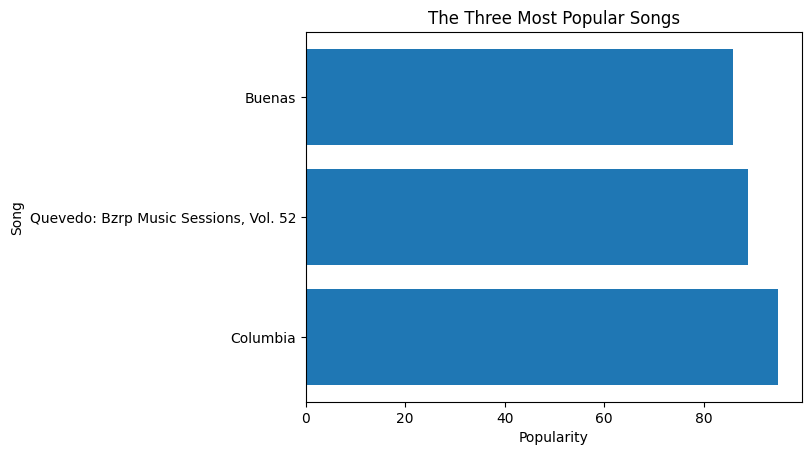

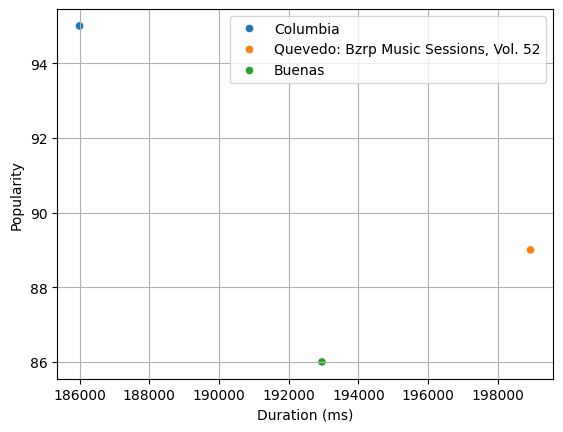

In [8]:
import os  # Import the os module for working with the operating system
from dotenv import load_dotenv  # Import load_dotenv function from dotenv module to load environment variables
import pandas as pd  # Import the pandas library for data manipulation and analysis
import spotipy  # Import the spotipy library for working with the Spotify API
from spotipy import Spotify  # Import the Spotify class from the spotipy module
from spotipy.oauth2 import SpotifyOAuth  # Import SpotifyOAuth for authentication
from spotipy.oauth2 import SpotifyClientCredentials  # Import SpotifyClientCredentials for authentication
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for creating plots and charts
import seaborn as sns  # Import seaborn for data visualization

# Load the environment variables from the .env file
load_dotenv()

# Get the CLIENT_ID and CLIENT_SECRET from the environment variables
client_id = os.environ.get("CLIEND_ID")  # Retrieve the CLIENT_ID
client_secret = os.environ.get("CLIENT_SECRET")  # Retrieve the CLIENT_SECRET

# Control - Print the retrieved CLIENT_ID and CLIENT_SECRET
print(client_id)
print(client_secret)

# Load the environment variables from the .env file (again, it's already loaded above)
load_dotenv()

# Obtain the CLIENT_ID and CLIENT_SECRET from the environment variables (again)
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Configure authentication with the provided keys using SpotifyClientCredentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = Spotify(auth_manager=auth_manager)  # Create a Spotify instance

artist_id = "52iwsT98xCoGgiGntTiR7K"
# Get the top 10 tracks of the artist with the specified artist_id
top_tracks = sp.artist_top_tracks(artist_id)

# Print the top 10 tracks of the artist
print(f"The top 10 tracks by {top_tracks['tracks'][0]['artists'][0]['name']} are:")
for track in top_tracks['tracks'][:10]:
    print(f"{track['name']} - {', '.join([artist['name'] for artist in track['artists']])}")

# Create a DataFrame from the data of the top tracks
df = pd.json_normalize(top_tracks['tracks'])

# Select the columns of interest
df = df[['name', 'duration_ms', 'popularity']]

# Get the top 3 most popular tracks
top3 = df.sort_values(by='popularity', ascending=False).head(3)

print(top3)

# Create a horizontal bar chart using matplotlib
plt.barh(df_top3['name'], df_top3['popularity'])

# Configure axis labels
plt.xlabel('Popularity')
plt.ylabel('Song')
plt.title('The Three Most Popular Songs')

# Show the chart
plt.show()

# Create a scatter plot with Seaborn
sns.scatterplot(data=top3, x="duration_ms", y="popularity", hue="name")

# Configure axis labels
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)

# Show the legend
plt.legend()

# Show the plot
plt.show()



